## Install dependencies

In [1]:
pip install matplotlib seaborn yfinance pandas_datareader xlrd datetime

Note: you may need to restart the kernel to use updated packages.


# Question #1

### Report Class

In [2]:
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import time
import seaborn as sns
from pandas_datareader import data as pdr



def true_range(high, low, previous_close=0):
    return max(abs(high - low),
               abs(high - previous_close),
               abs(low - previous_close))
   


In [3]:
class Reports:

    def __init__(self):
        self.data = None
        self.atr = None
        self.tr = None
        self.retrieve_data()

    # Retrieve data from yahoo finances
    def retrieve_data(self):
        self.data = pdr.get_data_yahoo('SPY')
        return self.data.tail()

    # Calculate simple average in days
    def simple_average(self, days):
        data = self.data.tail(days)
        return str(sum(data["Close"]) / days)
   
    
    def set_true_range(self):
        info = self.data
        tr = []
        for i in range(len(self.data)):
            high = self.data.loc[:, "High"][-1+i]
            low = self.data.loc[:, "Low"][-1+i]
            previous = self.data.loc[:, "Close"][-2+i]
            tr.append(true_range(high,low,previous))
        
        info["TR"] = tr
        self.data = info
        
    def set_avg_5th_range(self):
        info = self.data
        result = []
        for i in range(len(info)):
            if i < 5:
                result.append(0)
            else:
                sum = 0
                for j in range(i,i-5,-1):
                    #print(info["TR"][j],"index:",i)
                    sum += info["TR"][j]
                result.append(sum/5)
                
        
        info["AVG5"] = result
        self.data = info
                    

    # Average true range in days
    def average_true_range(self, num):
        last_num_days = self.data.tail(num + 1)
        # Exlude the last day
        last_num_days = last_num_days.iloc[:-1, :]
        avg = []
        for i in range(last_num_days.shape[0]):
            high = last_num_days.loc[:, "High"][i]
            low = last_num_days.loc[:, "Low"][i]
            previus_one = 0 if i <= 0 else i - 1
            previous_close = last_num_days.loc[:, "Close"][previus_one]
            result = true_range(high, low, previous_close)
            avg.append(result)
            

        return np.mean(avg)
    
    
        

    # Daily % return
    def daily_return(self, days):
        data = self.data.tail(days)
        dif = data.loc[:, "Close"][-1] - data.loc[:, "Close"][0]
        return dif / 100 * data.loc[:, "Close"][0]

   

    # You can adjust by parameter the scale of the higher values 
    #num : scale to compare values and get higher values
    #Kind: 'tr'for True Range or 'avg' for Average True range of Last 5 days
    def optimize(self,num,kind=0):
        
        result = {}
        info = self.data
        mean = 0
        if kind.lower is "tr":
            mean = info["TR"].mean()
        else:
            mean = info["AVG5"].mean()
        rank = mean +  mean * num
        
        for i in range(len(self.data)):
            if kind.lower is "tr":
                value = info["TR"][i]
            else:
                value = info["AVG5"][i]
    
            if value > rank:
                date = info.index[i].strftime("%m/%d/%y")
                result[date] = value
                
                
            
                
                
                
        return result
                
                
            


### Main

In [4]:
report = Reports()
report.set_true_range()
report.data["TR"][1]=report.data.loc[:,["TR"]].median()
report.set_avg_5th_range()

current_TR = report.data["TR"][-1]
avg_tr = report.average_true_range(5)
daily_return = report.daily_return(5)




    







### Data Cleanning

In [5]:
report.data["AVG5"].max()

9.918002319335937

### Running 

/home/laika/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


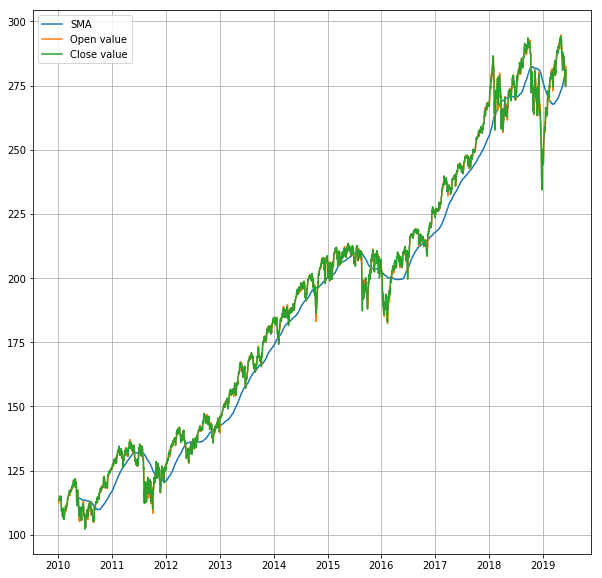

In [6]:
sma_ndays = report.data["Close"].rolling(100).mean()
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(sma_ndays,label='SMA')
plt.plot(report.data["Open"],label='Open value')
plt.plot(report.data["Close"],label='Close value')


plt.legend(loc=2)

In [7]:
print("The current TR is {0}".format(current_TR))
print("The avg tr in the last 5 days is {0}".format(avg_tr))
if current_TR < avg_tr:
    ans = "The % of return was {0} and the SMA was {1}".format(daily_return, sma)
else:
    ans = "The current TR is not lower than the Average TR"
print(ans)

The current TR is 6.1099853515625
The avg tr in the last 5 days is 3.647998046875
The current TR is not lower than the Average TR


## Optimization

In [115]:
result = report.optimize(1,"AVG5")

In [116]:
result

{'05/07/10': 4.272001647949219,
 '05/10/10': 4.697999572753906,
 '05/11/10': 5.401998901367188,
 '05/12/10': 5.205998229980469,
 '05/13/10': 5.197998046875,
 '08/08/11': 4.16400146484375,
 '08/09/11': 5.098001098632812,
 '08/10/11': 5.91400146484375,
 '08/11/11': 6.464002990722657,
 '08/12/11': 6.568002319335937,
 '08/15/11': 5.9120025634765625,
 '08/16/11': 4.816000366210938,
 '12/19/14': 5.447998046875,
 '12/22/14': 5.1239990234375,
 '12/23/14': 4.575997924804687,
 '08/25/15': 5.9499969482421875,
 '08/26/15': 7.45999755859375,
 '08/27/15': 8.439999389648438,
 '08/28/15': 8.510000610351563,
 '08/31/15': 7.596002197265625,
 '09/01/15': 4.996002197265625,
 '09/02/15': 4.652001953125,
 '09/09/15': 4.529998779296875,
 '09/10/15': 4.191998291015625,
 '01/14/16': 4.596002197265625,
 '01/15/16': 4.6699981689453125,
 '01/19/16': 5.097994995117188,
 '01/20/16': 5.161996459960937,
 '01/21/16': 5.887994384765625,
 '01/22/16': 5.437994384765625,
 '01/25/16': 5.13199462890625,
 '01/26/16': 4.47199

In [117]:
result = report.optimize(2,"tr")

In [118]:
def print_optimization():
    plt.figure(figsize=(15,10))
    date = list(result.keys())
    value = list(result.values())
    bar = sns.barplot(x=date,y=value)
    plt.xticks(rotation=45)

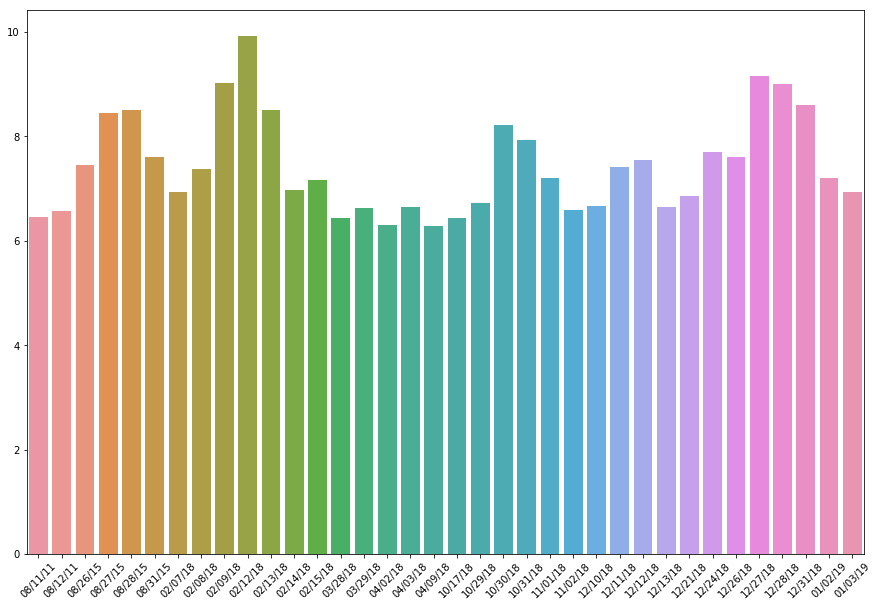

In [119]:
print_optimization()

# QUESTION #2

### Cleanner class

In [13]:
import pandas as pd
import datetime as dt
import numpy as np
from collections import Counter

class Cleanner():

    def __init__(self):
        self.data = None
        self.clean()

    # Delete some NaN dates
    def clean(self):
        data = pd.read_excel("test for trigger dates.xlsx")
        data = data.iloc[:, :3]
        data = data.dropna()
        #sns.countplot(data["date start"])
        self.data = data

    # Sort data by month and create a dictionary to store days
    def sort_data(self):
        data = self.data
        result = {}
        for value in data["date start"]:
            month_str = value.strftime("%B")
            if month_str not in result:
                result[month_str] = []
            else:
                result[month_str].append(value.day)
                result[month_str] = list(result[month_str])

        return result
    
    # Show and count how many times a day repeat trought the time
    def show_data(self):
        result = {}
        data = self.sort_data()
        for value in data.keys():
            result[value] = Counter(data[value])
        
        return result
    
    
        

            
    
    
 
        
    


In [14]:
cln = Cleanner()

In [15]:
data = cln.show_data()

In [108]:
def sort_dict(mydict):
    result = {}
    for key, value in sorted(mydict.items(), key=lambda item: item[1],reverse=True):
        result[key] = value
    
    return result

#Get the higher num of repeated data
def optimize(num):
    info = cln.show_data()
    result = {}
    
    for row in info.items():
        
        elem = sort_dict(row[1])
        days = list(elem.keys())
        values = list(elem.values())
        count = {}
        for i in range(0,num):
          
            count[days[i]] = values[i]
            #print(values[i])
        
        result[row[0]] = count
        
      
        
    
    return result
        
    
            
            
            


In [109]:
optimize(3)

{'January': {20: 5, 28: 4, 12: 3},
 'February': {8: 5, 2: 4, 11: 4},
 'March': {17: 5, 7: 4, 20: 4},
 'May': {1: 6, 19: 4, 17: 3},
 'July': {19: 4, 15: 4, 10: 3},
 'August': {19: 6, 24: 4, 30: 4},
 'September': {16: 7, 3: 3, 22: 3},
 'October': {3: 5, 11: 3, 8: 3},
 'November': {17: 5, 2: 5, 14: 4},
 'April': {2: 5, 13: 4, 29: 4},
 'June': {13: 5, 24: 4, 29: 4},
 'December': {28: 4, 10: 4, 27: 3}}

## VISUALIZE 

In [110]:
### Count the number of times a date is repeated
### Num: num values that most repeated
def count_days(num):
    result = {}
    info = optimize(num)
    for val in info:
        for elem in info[val]:
            if elem in result:
                result[elem]+=  info[val][elem]
            else:
                result[elem] = info[val][elem]
        
    return sort_dict(result)

Text(0, 0.5, 'Count')

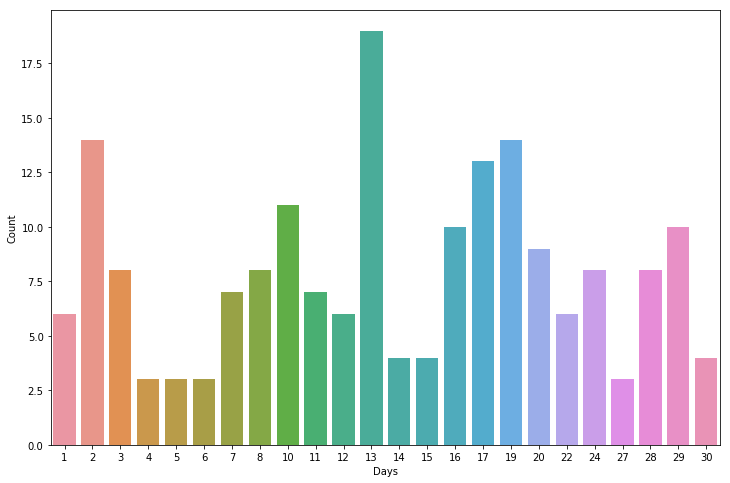

In [111]:
result = count_days(4)
days = list(result.keys())
count = list(result.values())
plt.figure(figsize=(12,8))
sns.barplot(x=days,y=count)
plt.xlabel("Days")
plt.ylabel("Count")

In [112]:
result

{13: 19,
 2: 14,
 19: 14,
 17: 13,
 10: 11,
 16: 10,
 29: 10,
 20: 9,
 28: 8,
 8: 8,
 24: 8,
 3: 8,
 11: 7,
 7: 7,
 12: 6,
 1: 6,
 22: 6,
 15: 4,
 30: 4,
 14: 4,
 5: 3,
 4: 3,
 27: 3,
 6: 3}